In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, f1_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
import xgboost as xgb

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2489,1032-MAELW,Female,0,Yes,Yes,68,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,One year,Yes,Electronic check,78.45,5333.35,No
717,9944-AEXBM,Male,0,No,No,32,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,2664.3,No
6580,7696-AMHOD,Female,0,Yes,Yes,49,Yes,No,DSL,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.2,No
1066,9646-NMHXE,Male,0,Yes,No,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,973.1,No
1216,0040-HALCW,Male,0,Yes,Yes,54,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.40,1090.6,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


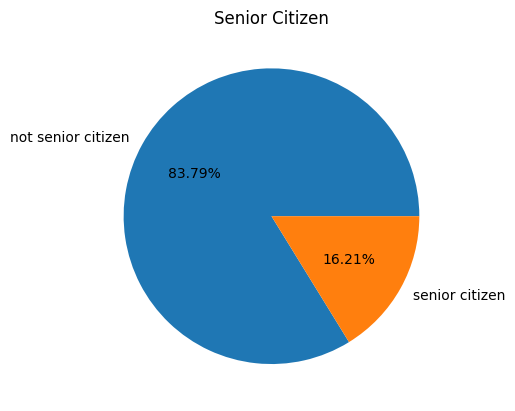

In [ ]:
plt.pie(df['SeniorCitizen'].value_counts(), labels=['not senior citizen', 'senior citizen'], autopct='%1.2f%%')
plt.title('Senior Citizen')
plt.show()

In [ ]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


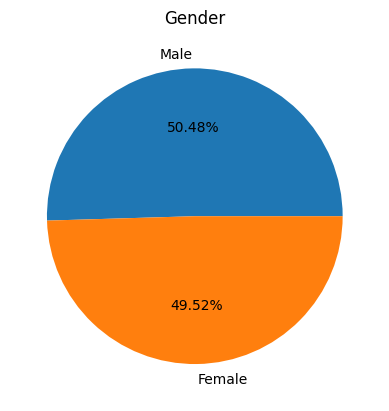

In [ ]:
plt.pie(df['gender'].value_counts(), labels = ['Male', 'Female'], autopct='%1.2f%%')
plt.title('Gender')
plt.show()

In [ ]:
df['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


[]

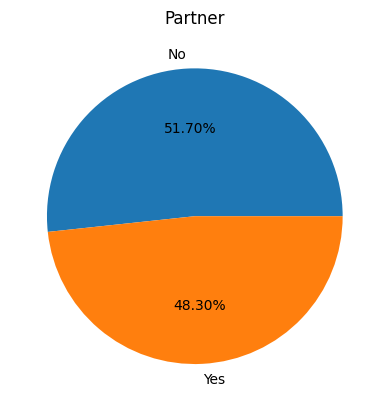

In [ ]:
plt.pie(df['Partner'].value_counts(), labels = ['No', 'Yes'], autopct='%1.2f%%')
plt.title('Partner')
plt.plot()

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


[]

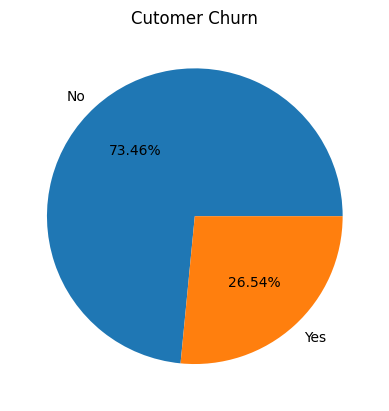

In [ ]:
plt.pie(df['Churn'].value_counts(), labels = ['No', 'Yes'], autopct='%1.2f%%')
plt.title('Cutomer Churn')
plt.plot()

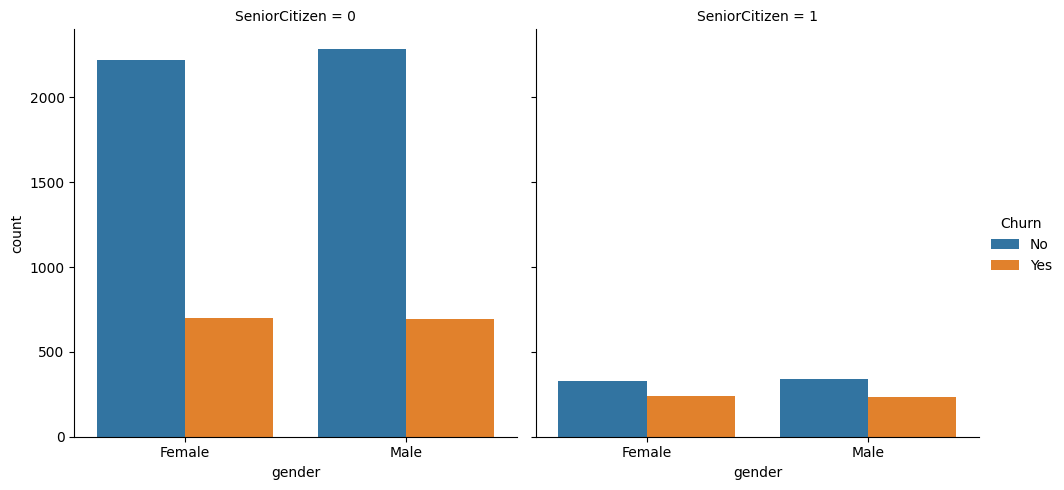

In [ ]:
sns.catplot(x='gender', hue='Churn', col='SeniorCitizen', data=df, kind='count')
plt.show()

In [ ]:
df['TotalCharges'].replace(" ", 0, inplace = True)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x:'No' if x == 0 else 'Yes')

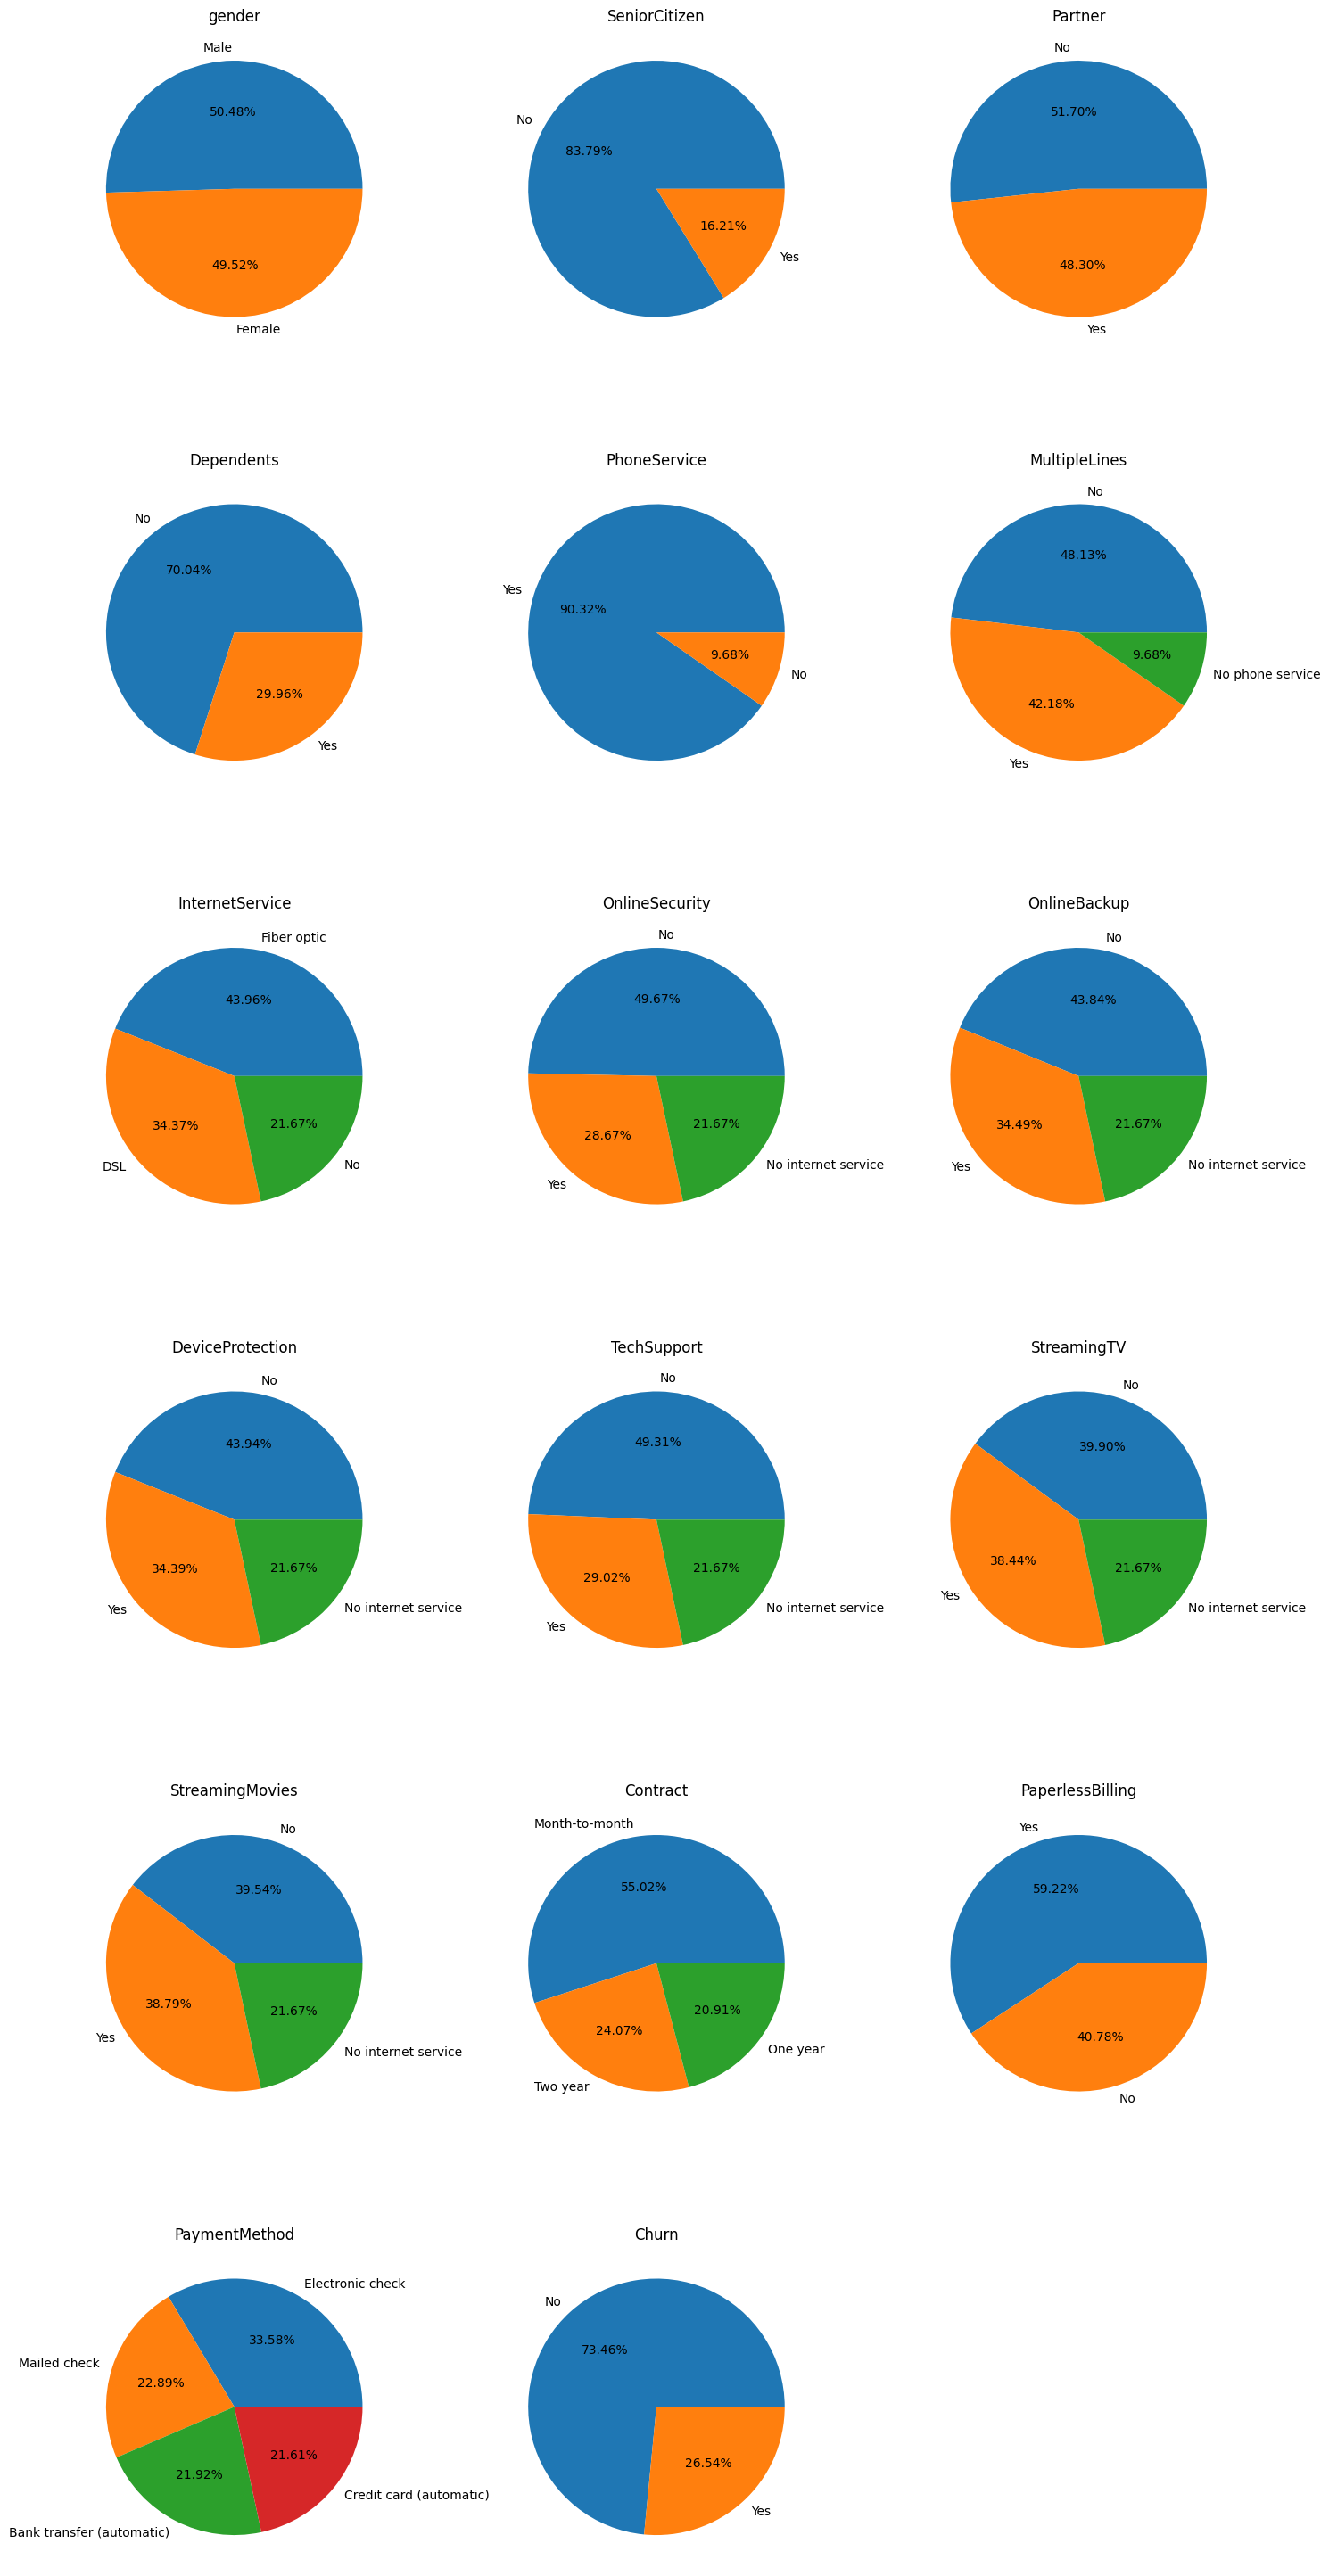

In [ ]:
# Get only categorical columns except 'customerID'
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col != 'customerID']
n = len(cat_cols)

cols = 3  # Charts per row
rows = math.ceil(n / cols)  # Auto calc rows needed

plt.figure(figsize=(5 * cols, 5 * rows))  # Adjust figure size

for i, col in enumerate(cat_cols):
    plt.subplot(rows, cols, i+1)

    data = df[col].value_counts().values
    labels = df[col].value_counts().index

    plt.pie(data, labels=labels, autopct='%1.2f%%')
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
df.rename(columns={'InternetService' : 'InternetServiceTypes'}, inplace=True)

In [ ]:
df['InternetService'] = df['InternetServiceTypes'].apply(lambda x:'Yes' if x in ['DSL', 'Fiber optic'] else 'No')

In [ ]:
df['InternetService'].value_counts()

,count
InternetService,
Yes,5517
No,1526


In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetServiceTypes,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService
2088,6784-XYJAE,Female,No,No,No,36,Yes,Yes,DSL,No,...,No,No,No,One year,No,Electronic check,55.80,1941.50,No,Yes
1944,0420-BWTPW,Male,No,No,Yes,8,No,No phone service,DSL,No,...,No,No,No,Month-to-month,No,Mailed check,25.50,215.20,Yes,Yes
3308,2706-QZIHY,Female,No,Yes,No,15,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.20,387.90,No,No
1236,5835-BEQEU,Male,No,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,76.95,228.40,Yes,Yes
2254,7322-OCWHC,Male,Yes,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Two year,Yes,Bank transfer (automatic),93.05,6735.05,No,Yes


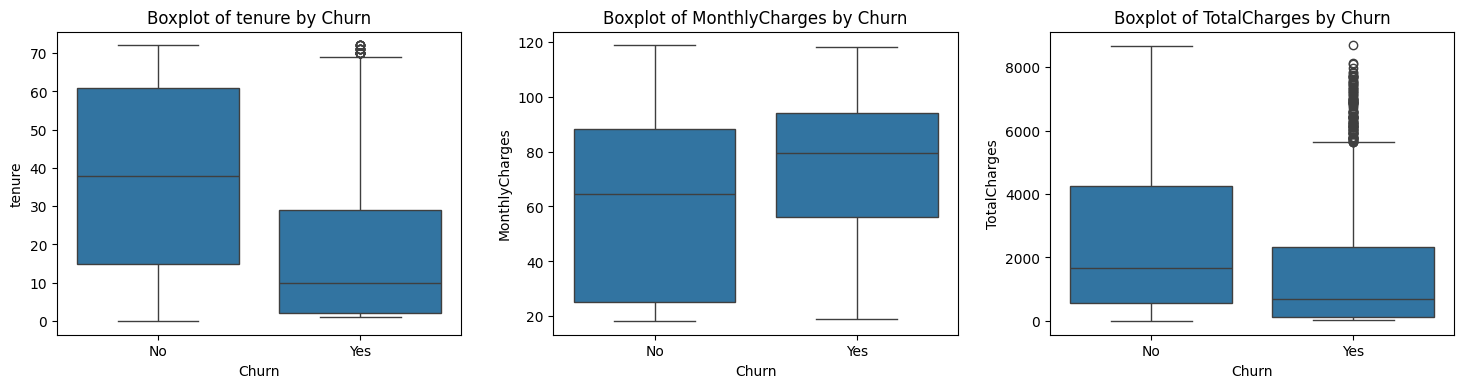

In [ ]:
plt.figure(figsize=(15, 30))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for i, col in enumerate(numeric_cols):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Boxplot of {col} by Churn')

plt.tight_layout(pad=2)
plt.show()

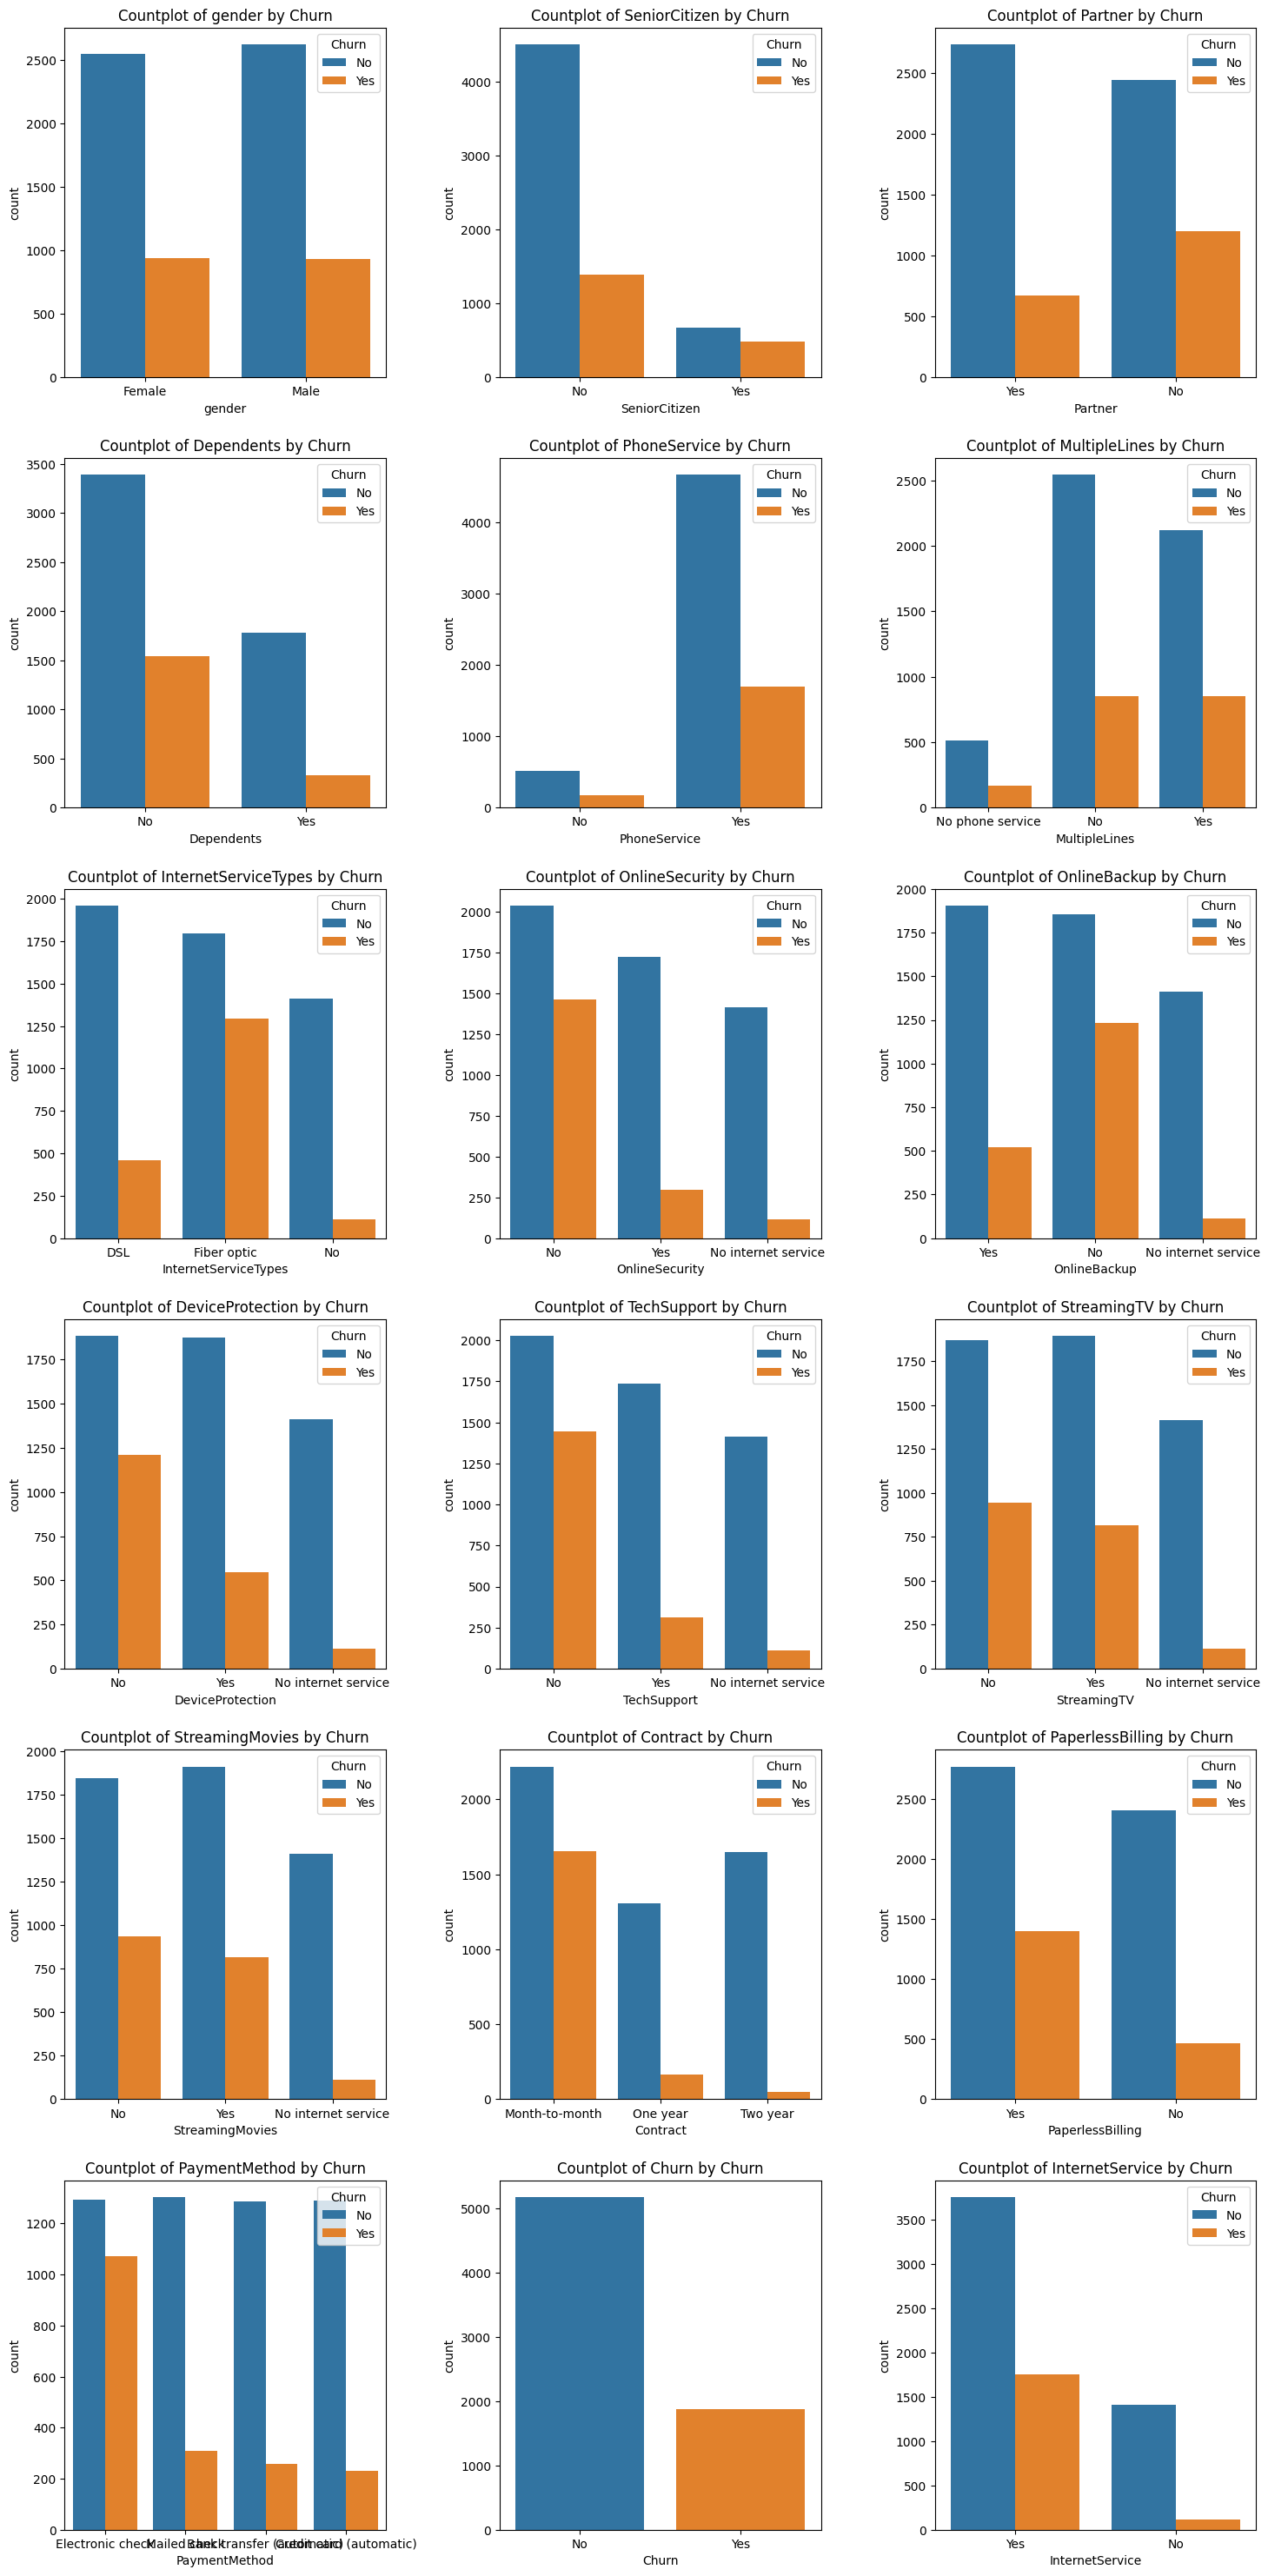

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col != 'customerID']

plt.figure(figsize=(5 * cols, 5 * rows))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, cols, i+1)

    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Countplot of {col} by Churn')

plt.tight_layout(pad=2)
plt.show()

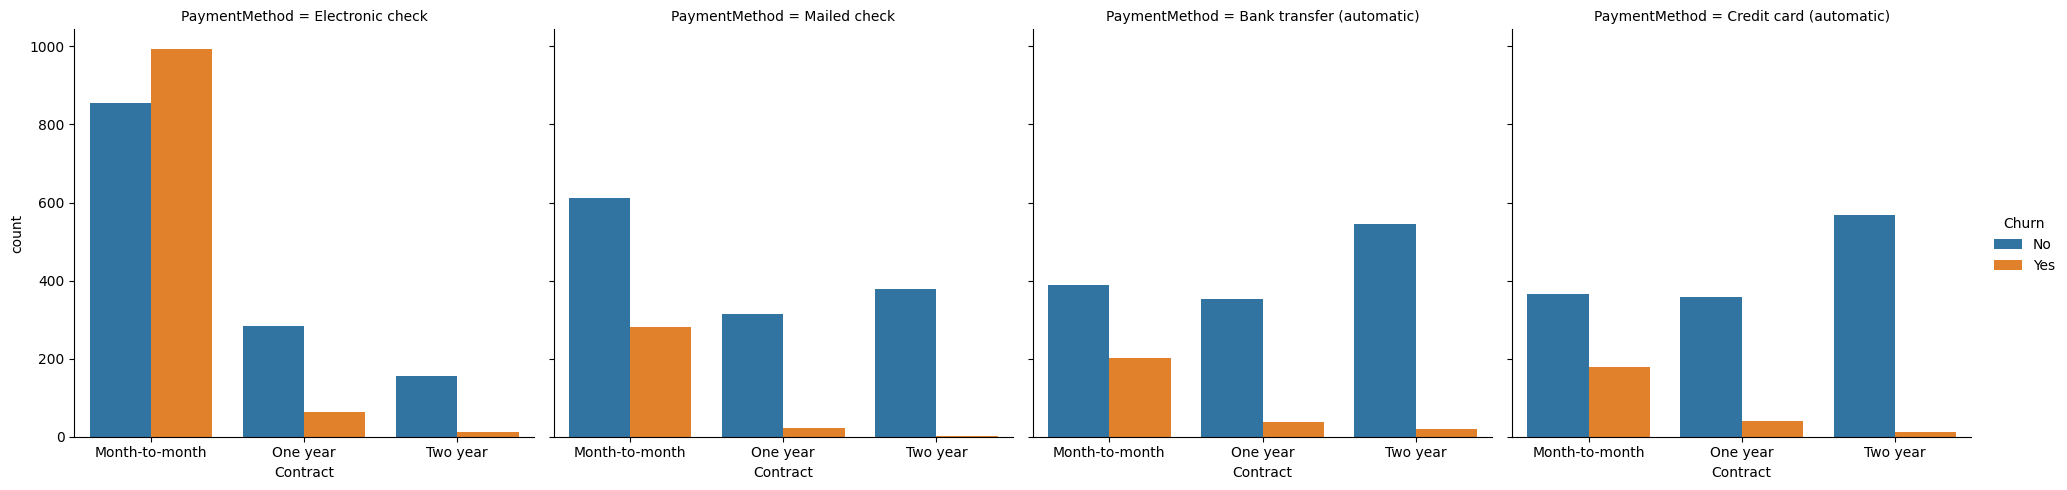

In [ ]:
sns.catplot(x='Contract', hue='Churn', col='PaymentMethod', kind='count', data=df)
plt.show()

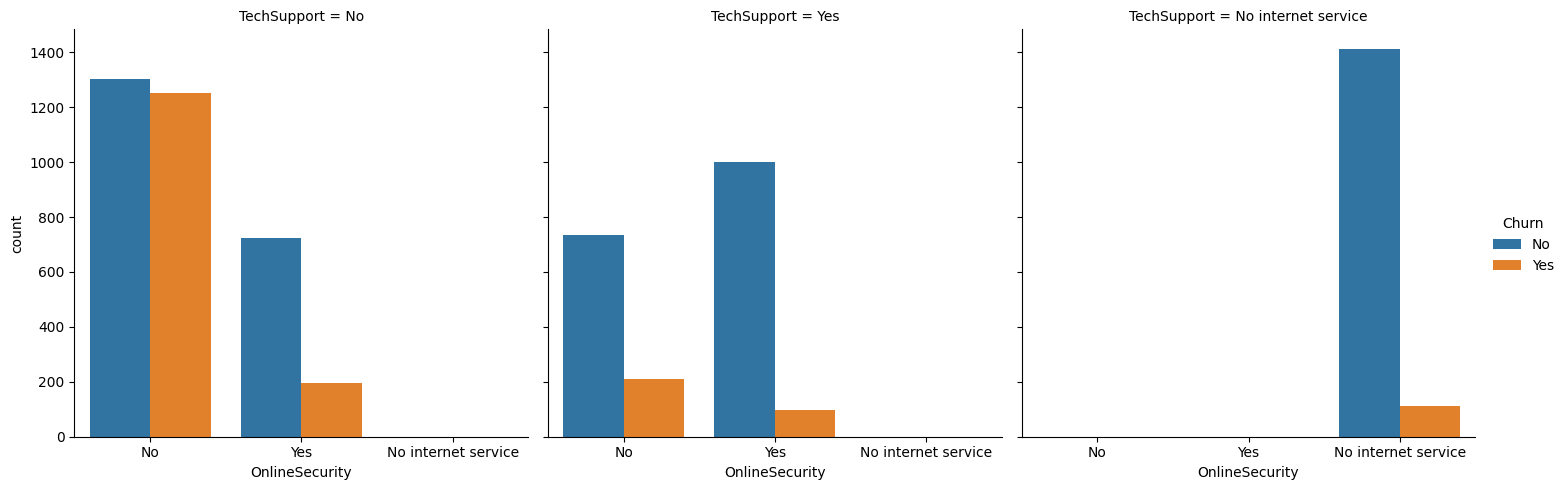

In [ ]:
sns.catplot(x='OnlineSecurity', hue='Churn', col='TechSupport', kind='count', data=df)
plt.show()

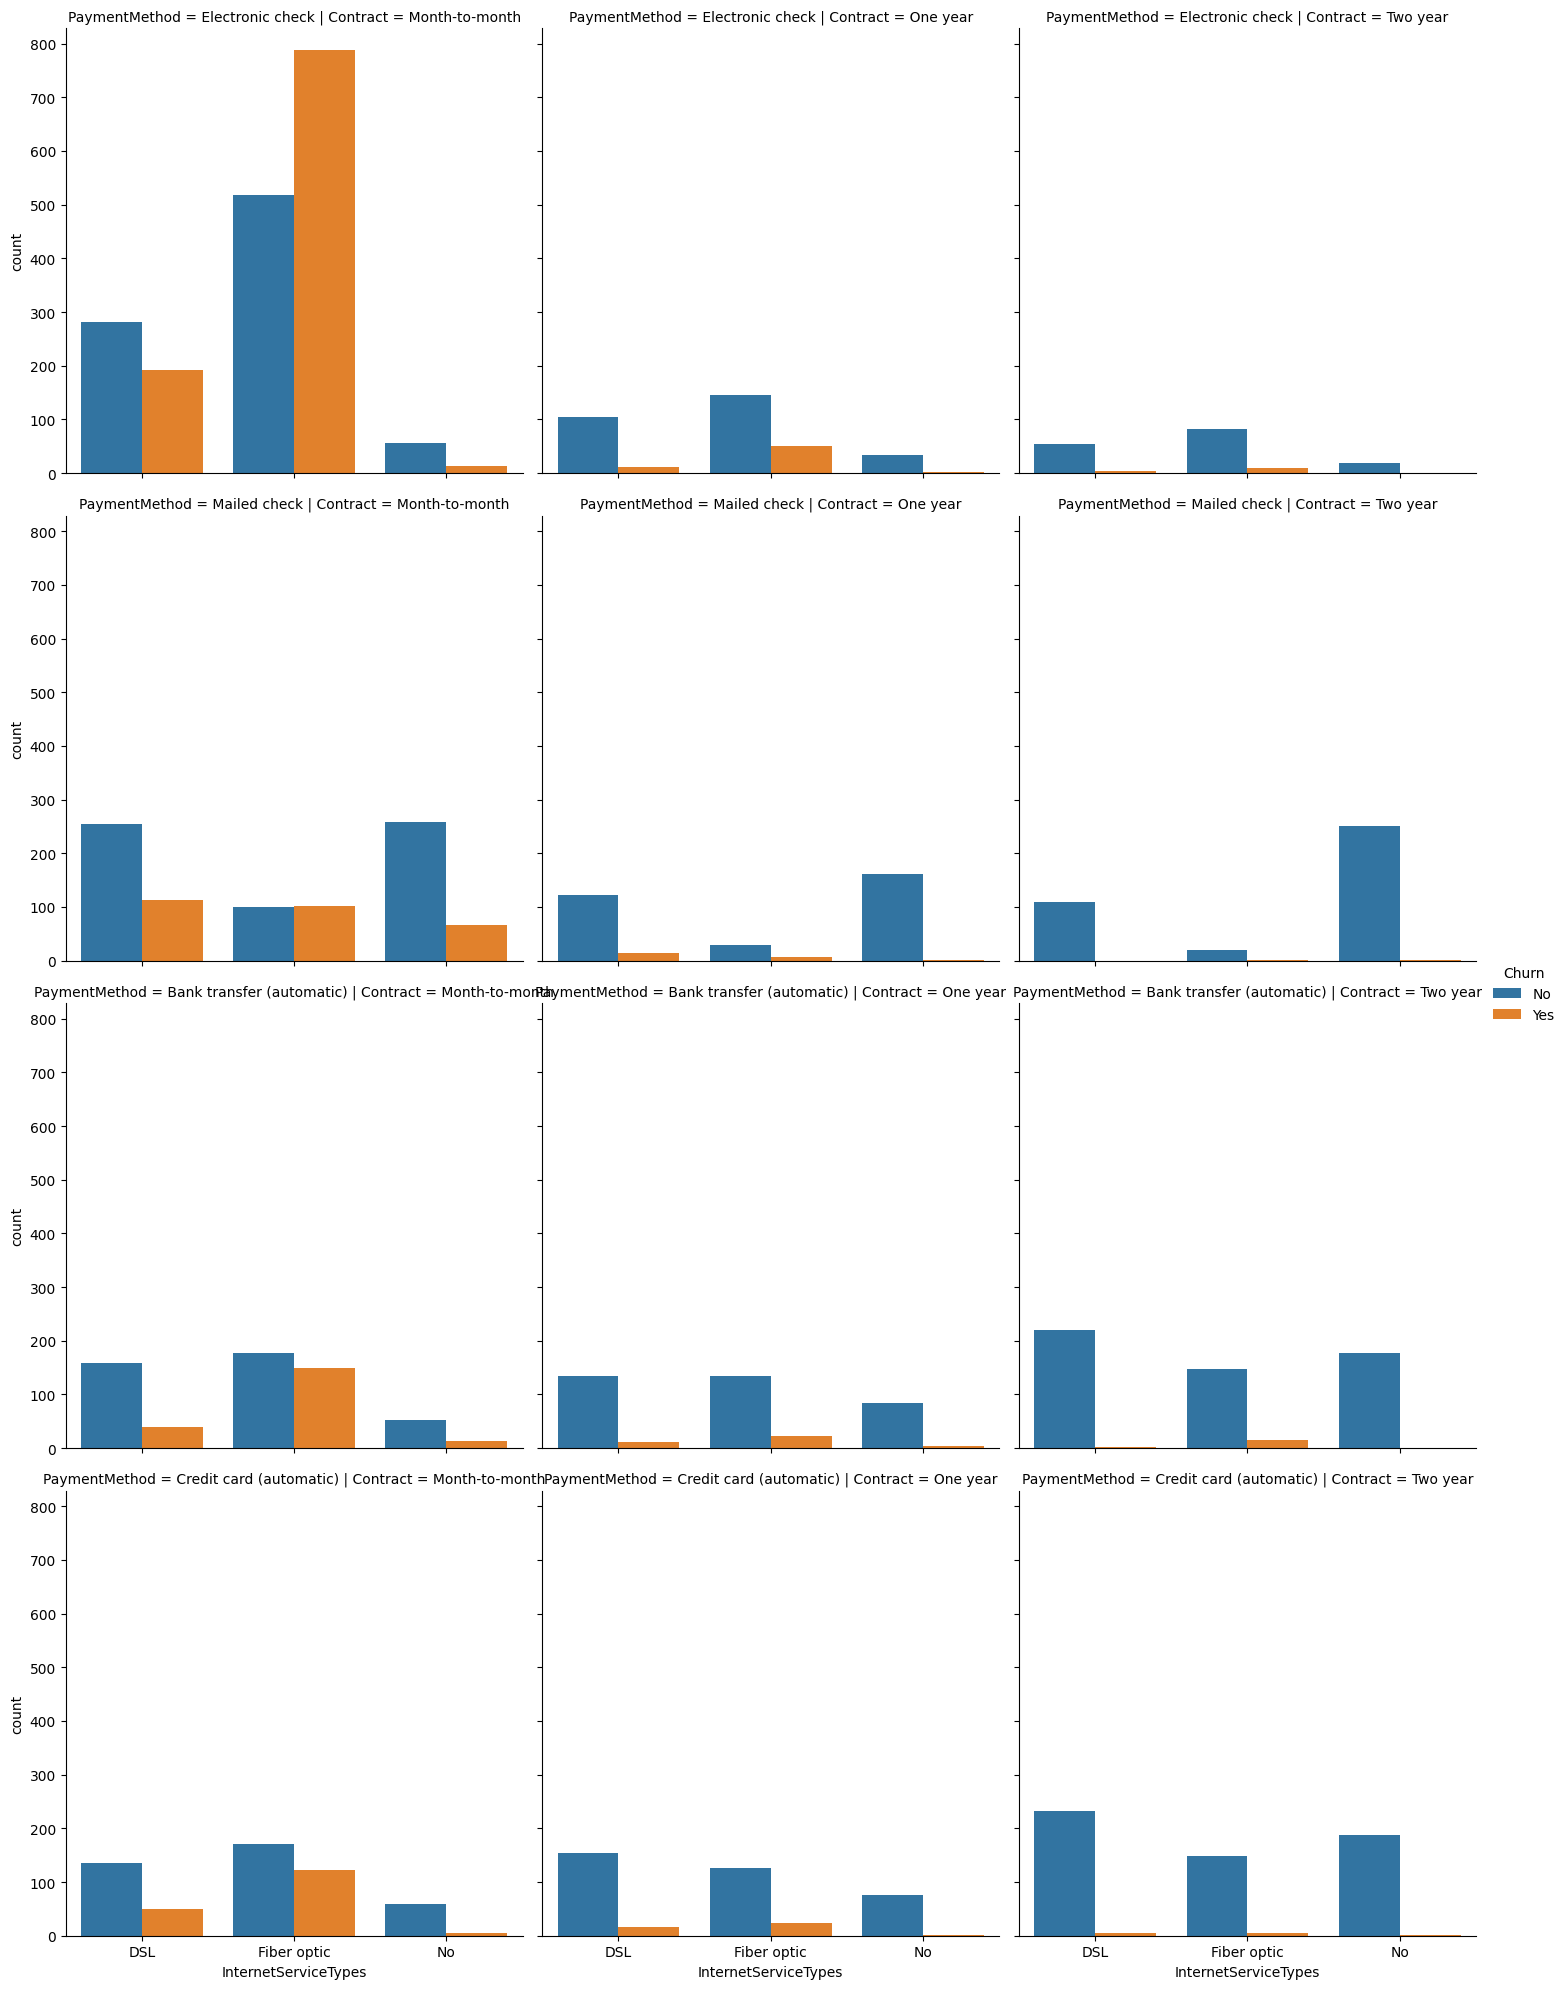

In [ ]:
sns.catplot(x='InternetServiceTypes', hue='Churn', col='Contract', row='PaymentMethod', kind='count', data=df)
plt.show()

In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetServiceTypes,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService
294,1563-IWQEX,Female,No,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,220.35,No,No
3557,2045-BMBTJ,Female,Yes,No,No,33,No,No phone service,DSL,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),59.45,1884.65,No,Yes
2803,1985-MBRYP,Female,No,No,No,43,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.65,779.25,No,No
770,7706-DZNKK,Male,No,No,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.45,237.30,No,No
3294,1086-LXKFY,Female,No,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,69.10,69.10,Yes,Yes


In [ ]:
df.drop(columns=['customerID'], inplace = True)

In [ ]:
df_dummy = pd.get_dummies(df, dtype='int', drop_first=True)

In [ ]:
df_dummy.sample(5)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,InternetService_Yes
660,4,24.25,96.05,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,1
2842,4,48.25,202.25,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
359,42,97.10,4016.75,1,0,1,1,1,0,1,...,0,1,1,0,0,0,1,0,0,1
1046,52,74.00,3877.65,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
3813,69,105.00,7297.75,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1


Text(0.5, 1.0, 'Monthly charges by churn')

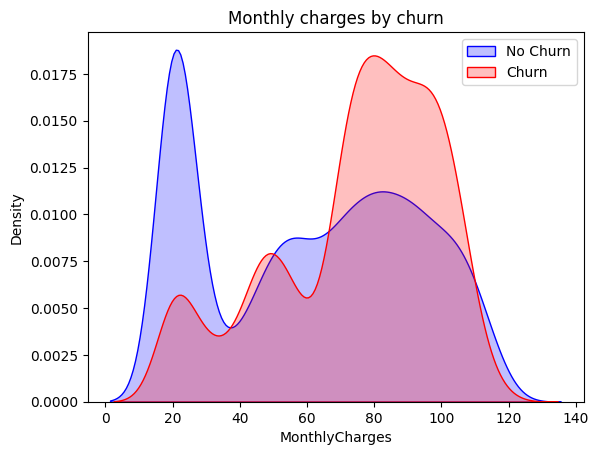

In [ ]:
Mth = sns.kdeplot(df_dummy.MonthlyCharges[df_dummy["Churn_Yes"] == 0], color="Blue", shade=True)
Mth = sns.kdeplot(df_dummy.MonthlyCharges[df_dummy["Churn_Yes"] == 1], color="Red", shade=True)

Mth.legend(["No Churn", "Churn"])
Mth.set_title('Monthly charges by churn')

[]

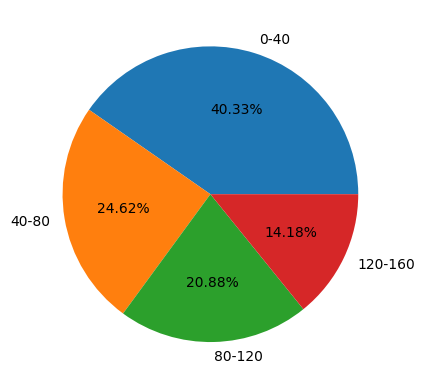

In [ ]:
bins = [0, 40, 80, 120, 160]
labels = ['0-40', '40-80', '80-120', '120-160']

TC = pd.cut(df['TotalCharges'], bins=bins, labels=labels, include_lowest=True)

plt.pie(TC.value_counts(), labels = labels, autopct='%1.2f%%')
plt.plot()

Text(0.5, 1.0, 'Monthly charges by churn')

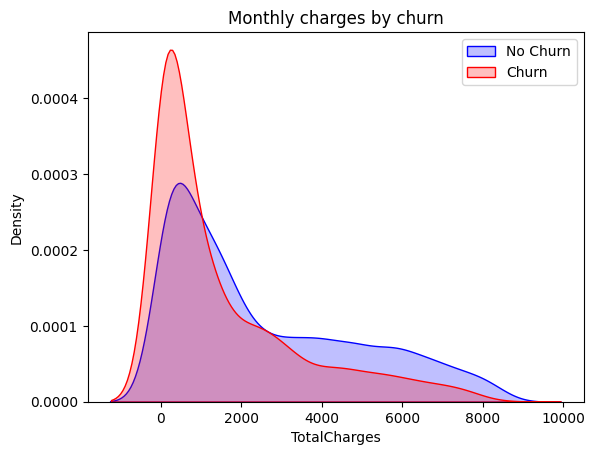

In [ ]:
Tot = sns.kdeplot(df_dummy.TotalCharges[df_dummy["Churn_Yes"] == 0], color="Blue", shade=True)
Tot = sns.kdeplot(df_dummy.TotalCharges[df_dummy["Churn_Yes"] == 1], color="Red", shade=True)

Tot.legend(["No Churn", "Churn"])
Tot.set_title('Monthly charges by churn')

[]

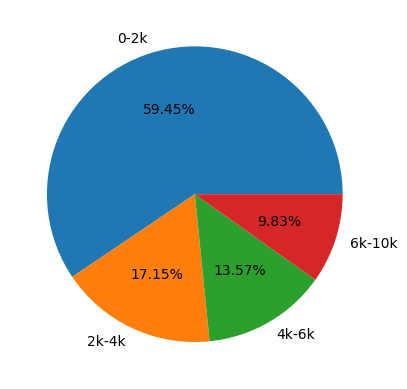

In [ ]:
bins = [0, 2000, 4000, 6000, 10000]
labels = ['0-2k', '2k-4k', '4k-6k', '6k-10k']

TC = pd.cut(df['TotalCharges'], bins=bins, labels=labels, include_lowest=True)

plt.pie(TC.value_counts(), labels = labels, autopct='%1.2f%%')
plt.plot()

In [ ]:
X = df_dummy.drop(columns=['Churn_Yes'])
y = df_dummy['Churn_Yes']

In [ ]:
scaler = StandardScaler()

scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_scaled = X.copy()
X_scaled[scale_cols] = scaler.fit_transform(X[scale_cols])
X_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Yes
0,-1.277445,-1.160323,-0.992611,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
1,0.066327,-0.259629,-0.172165,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
2,-1.236724,-0.362660,-0.958066,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.514251,-0.746535,-0.193672,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-1.236724,0.197365,-0.938874,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
classes = np.unique(y_train)
class_to_index = {cls: idx for idx, cls in enumerate(classes)}
y_train_numeric = np.array([class_to_index[cls] for cls in y_train])
class_counts = np.bincount(y_train_numeric)
total_samples = len(y_train_numeric)
class_weights = total_samples / (len(classes) * class_counts)
class_weights_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
class_weights_dict

{np.int64(0): np.float64(0.680763653939101),
 np.int64(1): np.float64(1.8830213903743316)}

In [ ]:
lr = LogisticRegression(class_weight=class_weights_dict)
dt = DecisionTreeClassifier(class_weight=class_weights_dict)
knn = KNeighborsClassifier(weights='uniform')
svm = SVC(class_weight=class_weights_dict)

In [ ]:
models = {'LogisticRegression': lr, 'DecisionTreeClassifier': dt, 'KNeighborsClassifier': knn, 'SVC': svm}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test ,model.predict(X_test))
    cnf_matrix = confusion_matrix(y_test ,model.predict(X_test))
    prec = precision_score(y_test ,model.predict(X_test))
    recall = recall_score(y_test ,model.predict(X_test))
    f1 = f1_score(y_test ,model.predict(X_test))
    print(f"accuracy of {name} = {acc}")
    print(f"{cnf_matrix}")
    print(f"precision score = {prec}")
    print(f"recall = {recall}")
    print(f"f1 score = {f1}\n")

accuracy of LogisticRegression = 0.7501774308019872
[[749 287]
 [ 65 308]]
precision score = 0.5176470588235295
recall = 0.8257372654155496
f1 score = 0.6363636363636364

accuracy of DecisionTreeClassifier = 0.7359829666430092
[[852 184]
 [188 185]]
precision score = 0.5013550135501355
recall = 0.4959785522788204
f1 score = 0.49865229110512127

accuracy of KNeighborsClassifier = 0.772888573456352
[[893 143]
 [177 196]]
precision score = 0.5781710914454278
recall = 0.5254691689008043
f1 score = 0.550561797752809

accuracy of SVC = 0.7565649396735273
[[762 274]
 [ 69 304]]
precision score = 0.5259515570934256
recall = 0.8150134048257373
f1 score = 0.6393270241850684



In [ ]:
param_dist_lr = {
    'penalty': ['l2', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

param_dist_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

param_dist_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'probability': [True]
}

In [ ]:
gs_models = [param_dist_lr, param_dist_dt, param_dist_knn, param_dist_svc]

In [ ]:
# Random Search CV and Gird Search CV
for (name, model), parms in zip(models.items(), gs_models):
    if model == svm:
        random_search = RandomizedSearchCV(model, parms, n_iter=10,cv=2, scoring='accuracy', n_jobs=-1, verbose=1)
        random_search.fit(X_train, y_train)
        print(f"{name}")
        print(random_search.best_params_)
        print(random_search.best_score_)
    else:
        grid_search = GridSearchCV(model, parms, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        print(f"{name}")
        print(grid_search.best_params_)
        print(grid_search.best_score_)
        print("-"*70)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
LogisticRegression
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7460063897763578
----------------------------------------------------------------------
Fitting 3 folds for each of 810 candidates, totalling 2430 fits
DecisionTreeClassifier
{'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
0.7502662406815762
----------------------------------------------------------------------
Fitting 3 folds for each of 60 candidates, totalling 180 fits
KNeighborsClassifier
{'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
0.7878949236776712
----------------------------------------------------------------------
Fitting 2 folds for each of 10 candidates, totalling 20 fits
SVC
{'probability': True, 'kernel': 'rbf', 'gamma': 1, 'degree': 3, 'C': 10}
0.756833510827121


In [ ]:
rf = RandomForestClassifier(class_weight=class_weights_dict)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"prec = {precision_score(y_test, y_pred)}")
print(f"recall = {recall_score(y_test, y_pred)}")
print(f"f1 = {f1_score(y_test, y_pred)}")

0.7913413768630234
[[947  89]
 [205 168]]
prec = 0.6536964980544747
recall = 0.450402144772118
f1 = 0.5333333333333333


In [ ]:
bc = BaggingClassifier(estimator=lr, )
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"prec = {precision_score(y_test, y_pred)}")
print(f"recall = {recall_score(y_test, y_pred)}")
print(f"f1 = {f1_score(y_test, y_pred)}")

0.7565649396735273
[[756 280]
 [ 63 310]]
prec = 0.5254237288135594
recall = 0.8310991957104558
f1 = 0.6438213914849429


In [ ]:
abc = AdaBoostClassifier(estimator=lr)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"prec = {precision_score(y_test, y_pred)}")
print(f"recall = {recall_score(y_test, y_pred)}")
print(f"f1 = {f1_score(y_test, y_pred)}")

0.7423704755145494
[[739 297]
 [ 66 307]]
prec = 0.5082781456953642
recall = 0.8230563002680965
f1 = 0.6284544524053224


In [ ]:
xb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)
xb.fit(X_train, y_train)
y_pred = xb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"prec = {precision_score(y_test, y_pred)}")
print(f"recall = {recall_score(y_test, y_pred)}")
print(f"f1 = {f1_score(y_test, y_pred)}")

0.8005677785663591
[[931 105]
 [176 197]]
prec = 0.652317880794702
recall = 0.5281501340482574
f1 = 0.5837037037037037


In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
sm = SMOTEENN()

X_resampled, y_resampled = sm.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [ ]:
model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"acc: {acc}\nprec: {prec}\nrecall: {recall}\nf1_score: {f1}\n{matrix}")

acc: 0.9171806167400881
prec: 0.9147909967845659
recall: 0.9327868852459016
f1_score: 0.9237012987012987
[[472  53]
 [ 41 569]]


In [ ]:
model_rf = RandomForestClassifier(random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"acc: {acc}\nprec: {prec}\nrecall: {recall}\nf1_score: {f1}\n{matrix}")

acc: 0.9268722466960353
prec: 0.9035222052067381
recall: 0.9672131147540983
f1_score: 0.934283452098179
[[462  63]
 [ 20 590]]


In [ ]:
import pickle
pickle.dump(model_rf, open('model.pkl', 'wb'))